![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [9]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


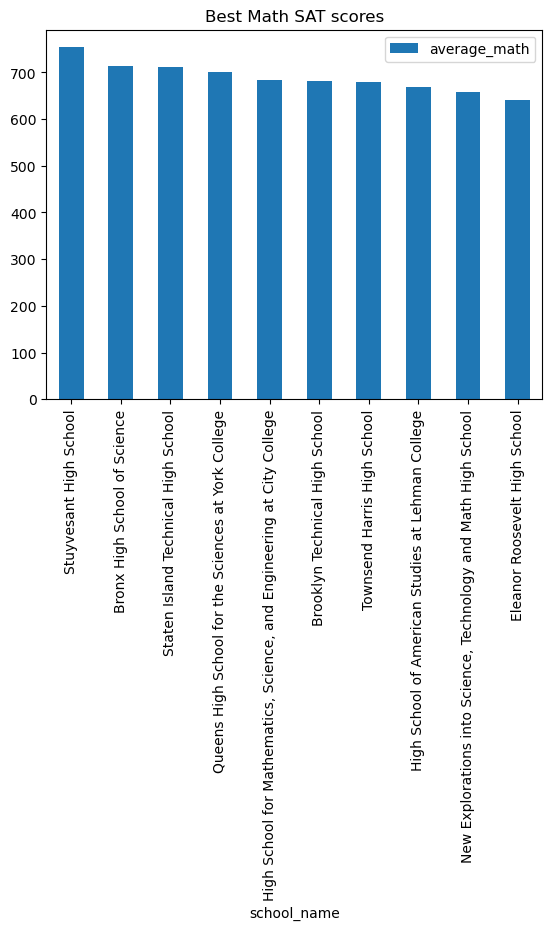

In [15]:
# Start coding here...
# Which NYC schools have the best math results?
# The best math results are at least 80% of the *maximum possible score of 800* for math.
# Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by   "average_math" in descending order.

best_math_schools = schools.loc[
    schools["average_math"] >= (0.8 * 800), ["school_name", "average_math"]
].sort_values('average_math', ascending=False)

best_math_schools.plot(kind="bar", title="Best Math SAT scores", x="school_name")
plt.show()

In [14]:
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [7]:
# What are the top 10 performing schools based on the combined SAT scores?

# Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order.

schools["total_SAT"] = schools['average_reading'] + schools["average_writing"] + schools["average_math"]

top_10_schools = schools.loc[:, ["school_name", "total_SAT"]].sort_values("total_SAT", ascending=False)

top_10_schools.head(10)

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [8]:
# Which single borough has the largest standard deviation in the combined SAT score?

# Save your results as a pandas DataFrame called largest_std_dev.
# The DataFrame should contain one row, with:
# "borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
# "num_schools" - the number of schools in the borough.
# "average_SAT" - the mean of "total_SAT".
# "std_SAT" - the standard deviation of "total_SAT".
# Round all numeric values to two decimal places.

borough = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
largest_std_dev = borough.loc[borough["std"] == borough["std"].max()]

largest_std_dev = largest_std_dev.rename(
    columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"}
)
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
